In [2]:
# -*- coding:utf-8 -*-
#!/usr/bin/env python
import argparse
import json
import matplotlib.pyplot as plt
import  sys
sys.path.append('C:\\Users\Administrator\Anaconda3\envs\labelme\Lib\site-packages') 
from labelme import utils
import numpy as np
from labelme.utils import image


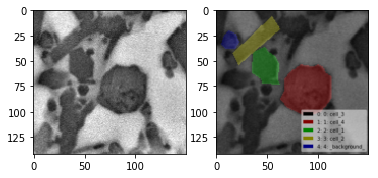

{'cell_3': 3, 'cell_4': 4, 'cell_1': 1, 'cell_2': 2, '_background_': 0}


In [4]:
json_file = "micro.json"#打开notebook 的路径是在与micro.json同一路径下
data = json.load(open(json_file)) # 加载json文件
img = utils.image.img_b64_to_arr(data['imageData']) # 解析原图片数据
lbl, lbl_names = utils.labelme_shapes_to_label(img.shape, data['shapes']) # 解析'shapes'中的字段信息，解析出每个对象的mask与对应的label   
    # lbl存储 mask，lbl_names 存储对应的label
    # lbl 像素取值 0、1、2、3、4 其中0对应背景，1对应第一个对象，2对应第二个对象……
    # 使用该方法取出每个对象的mask mask=[] mask.append((lbl==1).astype(np.uint8)) # 解析出像素值为1的对象，对应第一个对象 mask 为0、1组成的（0为背景，1为对象）
    # lbl_names  ['background','cat_1','cat_2']

captions = ['%d: %s' % (l, name) for l, name in enumerate(lbl_names)]
#print(captions)
lbl_viz = utils.draw_label(lbl, img, captions)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(lbl_viz)
plt.show()
print (lbl_names)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]


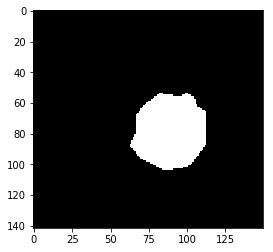

In [15]:
    data = json.load(open(json_file))

    img = utils.img_b64_to_arr(data['imageData'])
    lbl, lbl_names = utils.labelme_shapes_to_label(img.shape, data['shapes'])


    captions = ['%d: %s' % (l, name) for l, name in enumerate(lbl_names)]
    lbl_viz = utils.draw_label(lbl, img, captions)

    # lbl_names[0] 默认为背景，对应的像素值为0
    # 解析图片中的对象 像素值不为0（0 对应背景）
    mask=[]
    class_id=[]
    for i in range(1,len(lbl_names)): # 跳过第一个class（默认为背景）
        mask.append((lbl==i).astype(np.uint8)) # 解析出像素值为1的对应，对应第一个对象 mask 为0、1组成的（0为背景，1为对象）
        class_id.append(i) # mask与clas 一一对应

    print(mask)
    mask=np.transpose(np.asarray(mask,np.uint8),[1,2,0]) # 转成[h,w,instance count]
    #mask=np.asarray(mask,np.uint8) # 转成[h,w,instance count]
    class_id=np.asarray(class_id,np.uint8) # [instance count,]
   # print(class_id)
    #class_name=lbl_names[1:] # 不需要包含背景

    plt.imshow(mask[:,:,0],'gray')
    plt.show()

In [22]:
#不经过处理直接写入mask
import cv2
cv2.imwrite("mask1111.png", mask[:,:,0])

True

In [5]:
retval, im_at_fixed = cv2.threshold(mask[:,:,0], 0, 255, cv2.THRESH_BINARY) 
cv2.imwrite("mask_1111_real.png", im_at_fixed)

cv2.imshow("mask_1111",im_at_fixed) #显示图片 
cv2.waitKey (0)

-1

In [6]:
cv2.imwrite("mask_1111_real.png", im_at_fixed)

True

In [23]:
for i in range(0,len(class_id)):
    retval, im_at_fixed = cv2.threshold(mask[:,:,i], 0, 255, cv2.THRESH_BINARY) 
    cv2.imwrite("mask_out_{}.png".format(i), im_at_fixed)